In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

data = pd.read_csv("preprocessed_apartment_rentals_clusters.csv")
# Beispiel-Daten (ersetze X, y durch deine Daten)
features = data.drop(columns=["price", "cityname", "state"]).columns
print(features)
X, y = data.drop(columns=["price", "cityname", "state"]).values, data["price"].values
scaler = StandardScaler()
#scaler = MinMaxScaler
X = scaler.fit_transform(X)

Index(['bathrooms', 'bedrooms', 'has_photo', 'square_feet', 'latitude',
       'longitude', 'time', 'pool', 'gym', 'parking', 'sauna', 'elevator',
       'clubhouse', 'source_Andere source', 'source_GoSection8',
       'source_ListedBuy', 'source_RealRentals', 'source_RentDigs.com',
       'source_RentLingo', 'state_AK', 'state_AL', 'state_AR', 'state_AZ',
       'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN',
       'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME',
       'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC',
       'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV',
       'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
       'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA',
       'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY', 'cluster_0',
       '

## 🚀 Hyperparameter des GradientBoostingRegressor

Der **Gradient Boosting Regressor (GBR)** ist eine **sequenzielle Ensemble-Methode**, die schwache Modelle (typischerweise Entscheidungsbäume) iterativ kombiniert. Die Parameter definieren das Suchgitter (`gbr_params`) für die Optimierung in der Nested Cross-Validation.

| Parameter | Beschreibung | Im Code definierte Werte |
| :--- | :--- | :--- |
| **`n_estimators`** | Die **Anzahl der Boosting-Stufen** (Anzahl der sequenziell hinzugefügten schwachen Lerner, d.h. Bäume). | `[5, 50]` |
| **`learning_rate`** | Die **Schrumpfungsrate** ($\eta$). Skaliert den Beitrag jedes Baumes. Ein kleinerer Wert erfordert mehr `n_estimators`, verbessert aber oft die Generalisierung. | `[0.1, 0.2]` |
| **`max_depth`** | Die **maximale Tiefe** jedes einzelnen Entscheidungsbaums (des *schwachen Lerners*). GBR verwendet meist flache Bäume (z.B. Tiefe 3-5). | `[3, 5, 7]` |
| **`min_samples_split`** | Die **minimale Anzahl von Datenpunkten** in einem internen Knoten, die für eine Teilung erforderlich ist. Dient zur Kontrolle der Baumkomplexität. | `[5, 10]` |

---

### 💡 Erläuterung der Boosting-Strategie



Gradient Boosting arbeitet, indem es sequentielle Bäume aufbaut, wobei jeder neue Baum versucht, die **Restfehler** (Residuen) des vorherigen Ensembles zu korrigieren.

1.  **`n_estimators`** und **`learning_rate`** steuern zusammen die **Gesamtstärke** des Modells und die Geschwindigkeit des Lernprozesses.
2.  **`max_depth`** und **`min_samples_split`** steuern die **Komplexität** jedes einzelnen, schwachen Entscheidungsbaums, der zur Korrektur der Residuen verwendet wird.

Starte XGBoost Nested CV...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   1.6s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   1.6s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   1.6s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   1.4s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   1.6s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time=   2.0s
[CV] END ..learning

c:\Users\User\Git\DataProject-WS-25-26\Nested_CV.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


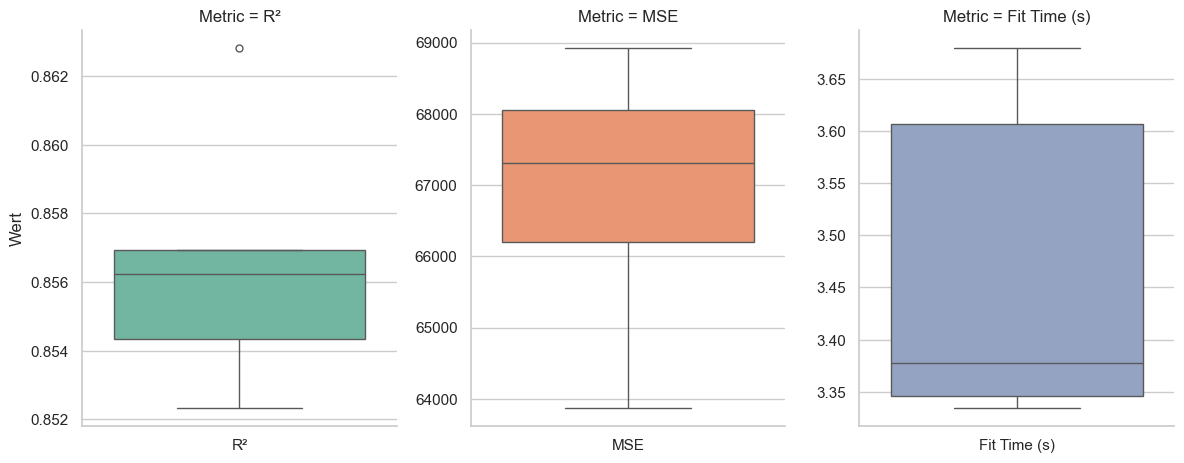


--- XGBoost Ergebnisse ---
Mean R²: 0.8565286408049569
Best params: [{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}, {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}, {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}, {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}, {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}]


In [3]:
from Nested_CV import NestedCVRegressor
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', 
    random_state=42,
    n_jobs=-1  # alle CPU-Kerne nutzen
)

# Hyperparameter-Grid
xgb_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.05, 0.1, 0.2],
    #"subsample": [0.8, 1.0],
    #"colsample_bytree": [0.8, 1.0],
    #"gamma": [0, 1],  # Minimum Loss Reduction
    #"reg_alpha": [0, 0.1],  # L1 Regularisierung
    #"reg_lambda": [1, 5]    # L2 Regularisierung
}

xgb_cv = NestedCVRegressor(xgb_model, xgb_params)

print("Starte XGBoost Nested CV...")
xgb_cv.run(X, y, output=True)

xgb_cv.plot_scores("XGBoost Nested CV")

print("\n--- XGBoost Ergebnisse ---")
print("Mean R²:", xgb_cv.get_mean_r2())
print("Best params:", xgb_cv.get_best_params())


In [4]:
number_outer_cv_splits = 5
model_evaluation = pd.DataFrame({"Fold": range(1, number_outer_cv_splits+1)})
model_evaluation['Modell'] = ['XGBOOST'] * number_outer_cv_splits
model_evaluation['R_2'] = xgb_cv.get_r2_scores()
model_evaluation['MSE'] = xgb_cv.get_mse_scores()
model_evaluation["runtime"] = xgb_cv.get_fit_times()
model_evaluation

,Fold,Modell,R_2,MSE,runtime
0,1,XGBOOST,0.854330,68923.773207,3.679673
1,2,XGBOOST,0.862826,63873.530376,3.607076
2,3,XGBOOST,0.856927,66197.032405,3.346026
3,4,XGBOOST,0.856228,68051.725368,3.334562
4,5,XGBOOST,0.852333,67303.102080,3.377625


In [5]:
model_evaluation.to_pickle('benchmarking/XGBOOST.pkl')

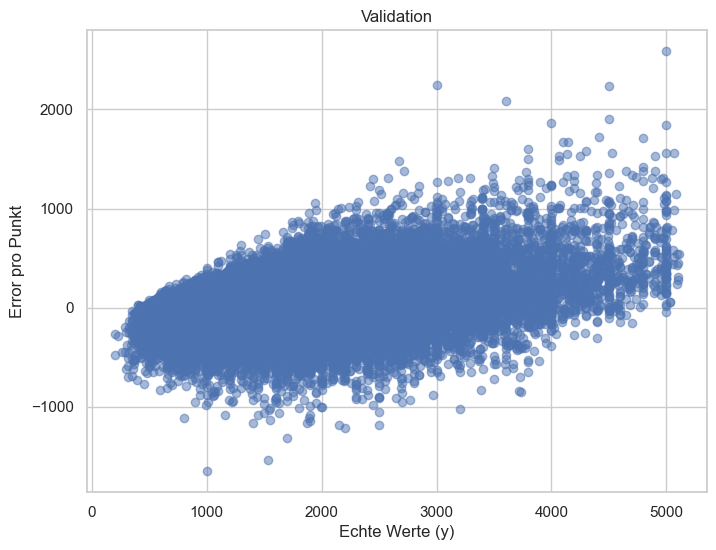

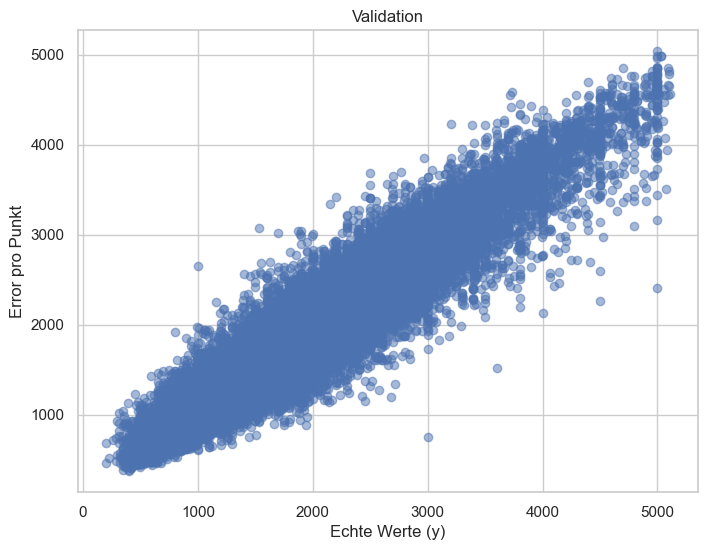

In [ ]:
best_params = {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}
xgb_final_model = xgb.XGBRegressor(
    objective='reg:squarederror', learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'], n_estimators=best_params['n_estimators'],
    random_state=42, n_jobs=-1)
xgb_final_model.fit(X, y)
# Vorhersagen
y_pred = xgb_final_model.predict(X)

import matplotlib.pyplot as plt
# RMSE pro Punkt (Absolutfehler oder quadratischer Fehler)
rmse_per_point = (y - y_pred)  # = |y_i - y_pred_i|

# Plot
plt.figure(figsize=(8,6))
plt.scatter(y, rmse_per_point, alpha=0.5)
plt.xlabel("Echte Werte (y)")
plt.ylabel("Error pro Punkt")
plt.title("Validation")
plt.grid(True)
plt.show()
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Echte Werte (y)")
plt.ylabel("Vorhergesagte Werte (y_pred)")
plt.title("Validation")
plt.grid(True)
plt.show()

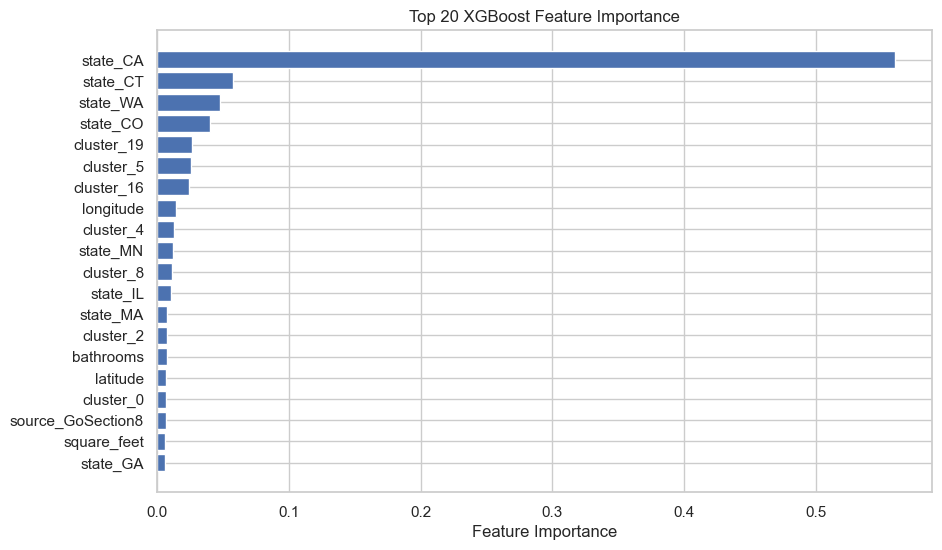

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Feature Importances
importances = xgb_final_model.feature_importances_

# Sortiere Indizes nach Wichtigkeit absteigend
indices = np.argsort(importances)[::-1]

# Nur die Top 20
top_n = 20
top_indices = indices[:top_n]
top_features = [features[i] for i in top_indices]
top_importances = importances[top_indices]

# Barplot
plt.figure(figsize=(10,6))
plt.barh(top_features[::-1], top_importances[::-1])  # umgekehrt für höchste oben
plt.xlabel("Feature Importance")
plt.title("Top 20 XGBoost Feature Importance")
plt.show()



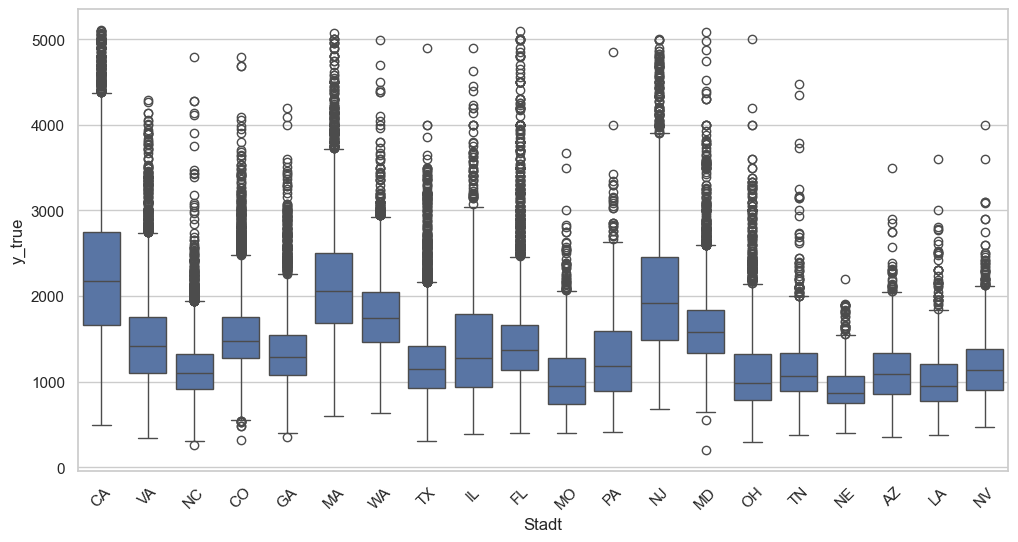

In [24]:
import seaborn as sns
# X ist dein Feature-Matrix (DataFrame oder np.array)
# columns = Liste aller Spaltennamen
state_columns = [col for col in features if col.startswith("state_")]

# Index der aktiven Spalte pro Zeile = die Stadt
state_index = data[state_columns].values.argmax(axis=1)

# Map zu Stadtname
state_names = [col.replace("state_", "") for col in state_columns]
df_states = pd.Series([state_names[i] for i in state_index], name="Stadt")

# Vorhersagen
y_pred = xgb_final_model.predict(X)

# Fehler
residuals = np.abs(y - y_pred)

# DataFrame für Analyse
df_plot = pd.DataFrame({
    "y_true": y,
    "y_pred": y_pred,
    "residual": residuals,
    "Stadt": df_states
})
top_states = df_plot['Stadt'].value_counts().head(20).index
df_top = df_plot[df_plot['Stadt'].isin(top_states)]

plt.figure(figsize=(12,6))
sns.boxplot(x="Stadt", y="y_true", data=df_top)
plt.xticks(rotation=45)
plt.show()

